# ***IMPORT LIBRARY***

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

# ***PREPROCESSING***

In [ ]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set=train.flow_from_directory('/content/drive/MyDrive/Food/Train',target_size = (64,64),batch_size = 12,class_mode = 'categorical')
test_set=validation.flow_from_directory('/content/drive/MyDrive/Food/Validation',target_size = (64,64),batch_size = 12,class_mode = 'categorical')

Found 651 images belonging to 10 classes.
Found 259 images belonging to 10 classes.


In [ ]:
train_set.class_indices

{'bánh khọt': 0,
 'bánh mỳ': 1,
 'bánh pía': 2,
 'bánh tráng nướng': 3,
 'bánh xèo': 4,
 'bún riêu cua': 5,
 'chả giò': 6,
 'cơm': 7,
 'gỏi cuốn': 8,
 'phở': 9}

# ***CREATE MODEL***

In [ ]:
model = tf.keras.models.Sequential(
    [ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape =(64,64,3)),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),
     
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_uniform'),
      tf.keras.layers.Dense(10,activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                  

# ***TRAINNING MODEL***

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_set,batch_size=128,epochs=10,verbose=1,validation_data=test_set)

Epoch 1/10
55/55 [==============================] - 5s 85ms/step - loss: 1.0651 - accuracy: 0.6406 - val_loss: 1.1927 - val_accuracy: 0.5830
Epoch 2/10
55/55 [==============================] - 5s 84ms/step - loss: 1.0403 - accuracy: 0.6206 - val_loss: 1.3207 - val_accuracy: 0.5174
Epoch 3/10
55/55 [==============================] - 5s 84ms/step - loss: 0.9597 - accuracy: 0.6590 - val_loss: 1.1475 - val_accuracy: 0.5830
Epoch 4/10
55/55 [==============================] - 5s 86ms/step - loss: 0.8505 - accuracy: 0.6882 - val_loss: 1.2218 - val_accuracy: 0.5869
Epoch 5/10
55/55 [==============================] - 5s 87ms/step - loss: 0.7568 - accuracy: 0.7419 - val_loss: 1.3565 - val_accuracy: 0.6023
Epoch 6/10
55/55 [==============================] - 5s 86ms/step - loss: 0.8220 - accuracy: 0.7435 - val_loss: 1.1507 - val_accuracy: 0.6100
Epoch 7/10
55/55 [==============================] - 5s 85ms/step - loss: 0.7151 - accuracy: 0.7634 - val_loss: 1.4618 - val_accuracy: 0.5328
Epoch 8/10
55

# ***EVALUATE***

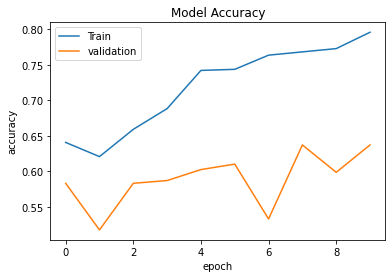

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [ ]:
score=model.evaluate(test_set,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

22/22 [==============================] - 1s 47ms/step - loss: 1.2869 - accuracy: 0.6371
Sai số:  1.2869176864624023
Độ chính xác:  0.6370656490325928


In [ ]:
model.save('Food.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('Food.h5')

# ***TESTING***

In [ ]:
def predict(result):
  if round(result[0][0])==1:
    print("bánh khọt")
  elif round(result[0][1])==1:
    print("bánh mỳ")
  elif round(result[0][2])==1:
    print("bánh pía")
  elif round(result[0][3])==1:
    print("bánh tráng nướng" ) 
  elif round(result[0][4])==1:
    print("bánh xèo") 
  elif round(result[0][5])==1:
    print("bún riêu cua")
  elif round(result[0][6])==1:
    print("chả giò") 
  elif round(result[0][7])==1:
    print("cơm")
  elif round(result[0][8])==1:
    print("gỏi cuốn")
  elif round(result[0][9])==1:
    print("phở")


bánh khọt


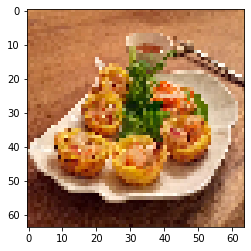

In [ ]:
test_img=load_img('/content/drive/MyDrive/Food/Test/bánh khọt/banhkhot (3).png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

bánh pía


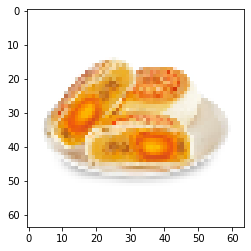

In [ ]:
test_img=load_img('/content/drive/MyDrive/Food/Test/bánh pía/banh-pia-800x800.png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

bánh khọt


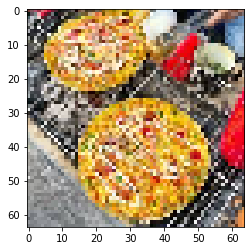

In [ ]:
test_img=load_img('/content/drive/MyDrive/Food/Test/bánh tráng nướng/image (2).png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

gỏi cuốn


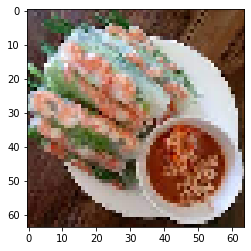

In [ ]:
test_img=load_img('/content/drive/MyDrive/Food/Test/gỏi cuốn/goicuon (3).png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

cơm


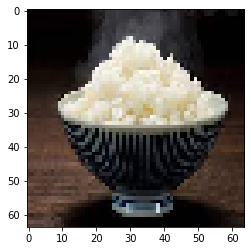

In [ ]:
test_img=load_img('/content/drive/MyDrive/Food/Test/cơm/com (2).png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

chả giò


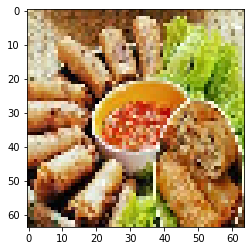

In [ ]:
test_img=load_img('/content/drive/MyDrive/Food/Test/chả giò/nemran (3).png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

phở


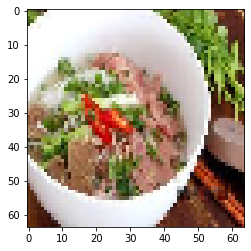

In [ ]:
test_img=load_img('/content/drive/MyDrive/Food/Test/phở/pho (3).png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

phở


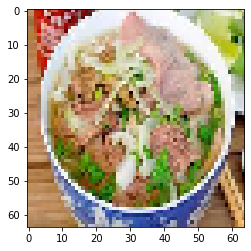

In [ ]:
test_img=load_img('/content/drive/MyDrive/Food/Test/phở/pho (1).png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

bánh mỳ


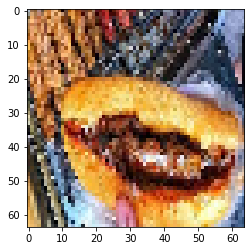

In [ ]:
test_img=load_img('/content/drive/MyDrive/Food/Test/bánh mỳ/banhmy (3).png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)